In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
combats = pd.read_csv('combats.csv')
combats.head()


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [4]:
combats['Winner_Label'] = np.where(combats['Winner'] == combats['First_pokemon'], 0, 1)

# or using np.select
conditions = [combats['Winner'] == combats['First_pokemon'], combats['Winner'] == combats['Second_pokemon']]
choices = [0, 1]

combats['Winner_Label'] = np.select(conditions, choices, default=np.nan)
combats.head()

,First_pokemon,Second_pokemon,Winner,Winner_Label
0,266,298,298,1.0
1,702,701,701,1.0
2,191,668,668,1.0
3,237,683,683,1.0
4,151,231,151,0.0


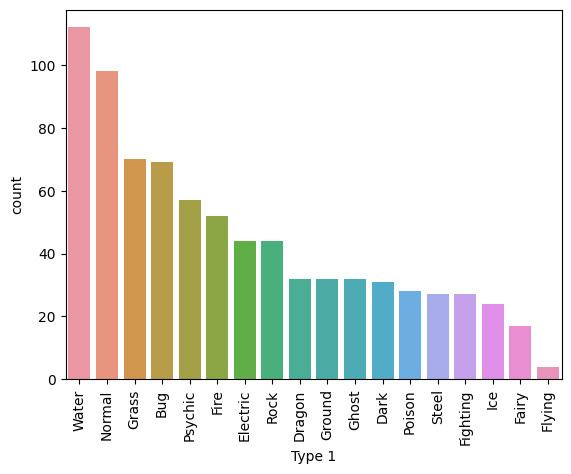

In [5]:
sns.countplot(x='Type 1', data=pokemon, order=pokemon['Type 1'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


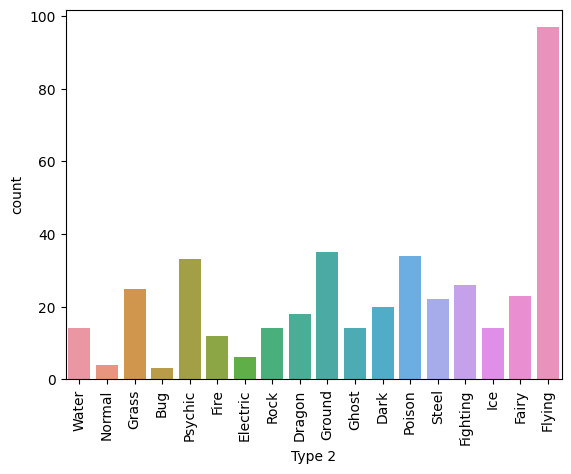

In [6]:
sns.countplot(x='Type 2', data=pokemon, order=pokemon['Type 1'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


C:\Users\rober\AppData\Local\Temp\ipykernel_15524\2742787477.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  individual_types = individual_types.append({'Type': row['Type 1']}, ignore_index=True)
C:\Users\rober\AppData\Local\Temp\ipykernel_15524\2742787477.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  individual_types = individual_types.append({'Type': row['Type 2']}, ignore_index=True)
C:\Users\rober\AppData\Local\Temp\ipykernel_15524\2742787477.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  individual_types = individual_types.append({'Type': row['Type 1']}, ignore_index=True)
C:\Users\rober\AppData\Local\Temp\ipykernel_15524\2742787477.py:8: FutureWarning: The frame.append method is deprecated and will be r

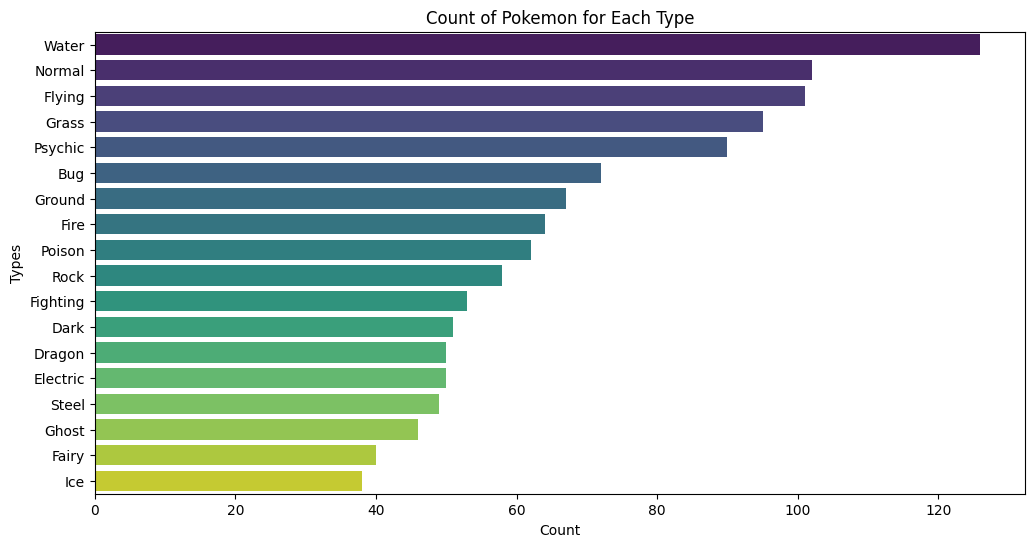

In [7]:
individual_types = pd.DataFrame()

# Iterate through the 'Type1' and 'Type2' columns to stack the individual types
for index, row in pokemon.iterrows():
    if isinstance(row['Type 1'], str):
        individual_types = individual_types.append({'Type': row['Type 1']}, ignore_index=True)
    if isinstance(row['Type 2'], str):
        individual_types = individual_types.append({'Type': row['Type 2']}, ignore_index=True)

# Count the occurrences of each type
type_counts = individual_types['Type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

# Create a Seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=type_counts, x='Count', y='Type', palette='viridis')
plt.xlabel('Count')
plt.ylabel('Types')
plt.title('Count of Pokemon for Each Type')
plt.show()


In [8]:
batallas = pd.read_csv('combats.csv')
batallas.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [9]:
pokemon['Total_stats'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense'] + pokemon['Sp. Atk'] + pokemon['Sp. Def'] + pokemon['Speed']
print(pokemon.iloc[:, [1, -1]].head())

            Name  Total_stats
0      Bulbasaur          318
1        Ivysaur          405
2       Venusaur          525
3  Mega Venusaur          625
4     Charmander          309


C:\Users\rober\AppData\Local\Temp\ipykernel_15524\2218735162.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pokemon.Total_stats)


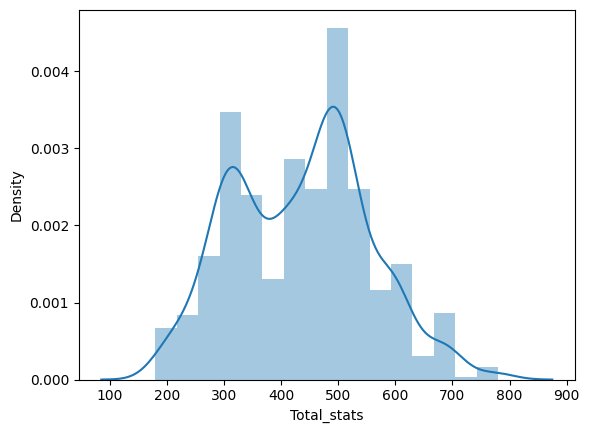

In [10]:
sns.distplot(pokemon.Total_stats)
plt.show()

In [11]:
pokemon['Legendary'] = pokemon['Legendary'].map({False: 0, True:1})
pokemon['Type 2'] = pokemon['Type 2'].fillna('None')

In [12]:
type_df = pokemon.iloc[:, 0:4]
names = type_df[['#','Name']]
print(names)
type_df = type_df.drop('Name', axis=1)
stats_df = pokemon.drop(['Type 1', 'Type 2', 'Name', 'Generation', 'Total_stats'], axis=1)

type_dict = type_df.set_index('#').T.to_dict('list')
stats_dict = stats_df.set_index('#').T.to_dict('list')
print(pd.DataFrame.from_dict(type_dict, orient='index'))
print(pd.DataFrame.from_dict(stats_dict, orient='index'))

       #            Name
0      1       Bulbasaur
1      2         Ivysaur
2      3        Venusaur
3      4   Mega Venusaur
4      5      Charmander
..   ...             ...
795  796         Diancie
796  797    Mega Diancie
797  798  Hoopa Confined
798  799   Hoopa Unbound
799  800       Volcanion

[800 rows x 2 columns]
           0       1
1      Grass  Poison
2      Grass  Poison
3      Grass  Poison
4      Grass  Poison
5       Fire    None
..       ...     ...
796     Rock   Fairy
797     Rock   Fairy
798  Psychic   Ghost
799  Psychic    Dark
800     Fire   Water

[800 rows x 2 columns]
      0    1    2    3    4    5  6
1    45   49   49   65   65   45  0
2    60   62   63   80   80   60  0
3    80   82   83  100  100   80  0
4    80  100  123  122  120   80  0
5    39   52   43   60   50   65  0
..   ..  ...  ...  ...  ...  ... ..
796  50  100  150  100  150   50  1
797  50  160  110  160  110  110  1
798  80  110   60  150  130   70  1
799  80  160   60  170  130   80  1
800 

In [13]:
def replace_things(data):
    #map each battles to pokemon data
    print(data.columns)
    
    data['First_pokemon_stats'] = data.First_pokemon.map(stats_dict)
    data['Second_pokemon_stats'] = data.Second_pokemon.map(stats_dict)

    data['First_Name'] = data['First_pokemon']
    data['Second_Name'] = data['Second_pokemon']

    data['First'] = data['First_pokemon']
    data['Second'] = data['Second_pokemon']

    data.rename(columns = {'First_Name':'#'}, inplace = True)
    data = data.merge(pokemon, on='#', how='left')
    data = data.drop(['#','Name'	,'Type 1'	,'Type 2'	,'HP'	,'Attack',	'Defense',	'Sp. Atk'	,'Sp. Def',	'Speed'], axis=1)
    data.rename(columns = {'Generation': 'Generation1','Legendary':'Legendary1'}, inplace = True)

    data.rename(columns = {'Second_Name':'#'}, inplace = True)
    data = data.merge(pokemon, on='#', how='left')
    data = data.drop(['#','Name'	,'Type 1'	,'Type 2'	,'HP'	,'Attack',	'Defense',	'Sp. Atk'	,'Sp. Def',	'Speed'], axis=1)
    data.rename(columns = {'Generation': 'Generation2','Legendary':'Legendary2'}, inplace = True)



    data['First_pokemon'] = data.First_pokemon.map(type_dict)
    data['Second_pokemon'] = data.Second_pokemon.map(type_dict)

    

    data[['Type1','Type2']] = pd.DataFrame(data.First_pokemon.tolist(), index= data.index)
    data[['Type1_OP','Type2_OP']] = pd.DataFrame(data.Second_pokemon.tolist(), index= data.index)



    return data

In [14]:
def calculate_effectiveness(data):
    very_effective_dict = {'Normal': [],
                           'Fighting': ['Normal', 'Rock', 'Steel', 'Ice', 'Dark'],
                           'Flying': ['Fighting', 'Bug', 'Grass'],
                           'Poison': ['Grass', 'Fairy'],
                           'Ground': ['Poison', 'Rock', 'Steel', 'Fire', 'Electric'],
                           'Rock': ['Flying', 'Bug', 'Fire', 'Ice'],
                           'Bug': ['Grass', 'Psychic', 'Dark'],
                           'Ghost': ['Ghost', 'Psychic'],
                           'Steel': ['Rock', 'Ice', 'Fairy'],
                           'Fire': ['Bug', 'Steel', 'Grass', 'Ice'],
                           'Water': ['Ground', 'Rock', 'Fire'],
                           'Grass': ['Ground', 'Rock', 'Water'],
                           'Electric': ['Flying', 'Water'],
                           'Psychic': ['Fighting', 'Poison'],
                           'Ice': ['Flying', 'Ground', 'Grass', 'Dragon'],
                           'Dragon': ['Dragon'],
                           'Dark': ['Ghost', 'Psychic'],
                           'Fairy': ['Fighting', 'Dragon', 'Dark'],
                           'None': []}

    not_very_effective_dict = {'Normal': ['Rock', 'Steel'],
                               'Fighting': ['Flying', 'Poison', 'Bug', 'Psychic', 'Fairy'],
                               'Flying': ['Rock', 'Steel', 'Electric'],
                               'Poison': ['Poison', 'Rock', 'Ground', 'Ghost'],
                               'Ground': ['Bug', 'Grass'],
                               'Rock': ['Fighting', 'Ground', 'Steel'],
                               'Bug': ['Fighting', 'Flying', 'Poison', 'Ghost', 'Steel', 'Fire', 'Fairy'],
                               'Ghost': ['Dark'],
                               'Steel': ['Steel', 'Fire', 'Water', 'Electric'],
                               'Fire': ['Rock', 'Fire', 'Water', 'Dragon'],
                               'Water': ['Water', 'Grass', 'Dragon'],
                               'Grass': ['Flying', 'Poison', 'Bug', 'Steel', 'Fire', 'Grass', 'Dragon'],
                               'Electric': ['Grass', 'Electric', 'Dragon'],
                               'Psychic': ['Steel', 'Psychic'],
                               'Ice': ['Steel', 'Fire', 'Water', 'Psychic'],
                               'Dragon': ['Steel'],
                               'Dark': ['Fighting', 'Dark', 'Fairy'],
                               'Fairy': ['Posion', 'Steel', 'Fire'],
                               'None': []}

    not_effective_dict = {'Normal': ['Ghost'],
                          'Fighting': ['Ghost'],
                          'Flying': [],
                          'Poison': ['Steel'],
                          'Ground': ['Flying'],
                          'Rock': [],
                          'Bug': [],
                          'Ghost': ['Normal'],
                          'Steel': [],
                          'Fire': [],
                          'Water': [],
                          'Grass': [],
                          'Electric': ['Ground'],
                          'Psychic': ['Dark'],
                          'Ice': [],
                          'Dragon': ['Fairy'],
                          'Dark': [],
                          'Fairy': [],
                          'None': []}

    p1_type1_list = []
    p1_type2_list = []
    p2_type1_list = []
    p2_type2_list = []

    for row in data.itertuples():
        nested_type = [[1, 1], [1, 1]]

        #manipulating values if found on dictionary
        for i in range(0,2):
            for j in range(0,2):
                print(row.Second_pokemon[j],row.First_pokemon[i])
                print(very_effective_dict.get(row.First_pokemon[i]))
                if row.Second_pokemon[j] in very_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] *= 2
                if row.Second_pokemon[j] in not_very_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] /= 2
                if row.Second_pokemon[j] in not_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] *= 0

                if row.First_pokemon[j] in very_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] *= 2
                if row.First_pokemon[j] in not_very_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] /= 2
                if row.First_pokemon[j] in not_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] *= 0

        p1_type1_list.append(nested_type[0][0])
        p1_type2_list.append(nested_type[0][1])
        p2_type1_list.append(nested_type[1][0])
        p2_type2_list.append(nested_type[1][1])

    data = data.assign(P1_type1=p1_type1_list, P1_type2=p1_type2_list, P2_type1=p2_type1_list, P2_type2=p2_type2_list)
    data = data.drop(['First_pokemon', 'Second_pokemon'], axis=1)

    return data

In [15]:
print(combats.head())
train_df = replace_things(combats)


   First_pokemon  Second_pokemon  Winner  Winner_Label
0            266             298     298           1.0
1            702             701     701           1.0
2            191             668     668           1.0
3            237             683     683           1.0
4            151             231     151           0.0
Index(['First_pokemon', 'Second_pokemon', 'Winner', 'Winner_Label'], dtype='object')


In [16]:
def calculate_stats(data):
    #calculate stats difference
    
    stats_col = ['HP_diff', 'Attack_diff', 'Defense_diff', 'Sp.Atk_diff', 'Sp.Def_diff', 'Speed_diff', 'Legendary_diff']
    diff_list = []

    for row in data.itertuples():
        diff_list.append(np.array(row.First_pokemon_stats) - np.array(row.Second_pokemon_stats))

    stats_df = pd.DataFrame(diff_list, columns=stats_col)
    data = pd.concat([data, stats_df], axis=1)
    data.drop(['First_pokemon_stats', 'Second_pokemon_stats'], axis=1, inplace=True)

    return data

In [17]:
train_df = calculate_stats(train_df)
train_df['Type1'] = train_df['Type1'].map({'Normal': 0, 'Fire': 1, 'Water': 2, 'Grass': 3, 'Flying' : 4, 'Fighting': 5, 'Poison':6, 'Electric':7, 'Ground':8, 'Rock':9, 'Psychic':10, 'Ice': 11, 'Bug': 12, 'Ghost': 13, 'Steel': 14, 'Dragon': 15, 'Dark': 16, 'Fairy': 17})
train_df['Type2'] = train_df['Type2'].map({'Normal': 0, 'Fire': 1, 'Water': 2, 'Grass': 3, 'Flying' : 4, 'Fighting': 5, 'Poison':6, 'Electric':7, 'Ground':8, 'Rock':9, 'Psychic':10, 'Ice': 11, 'Bug': 12, 'Ghost': 13, 'Steel': 14, 'Dragon': 15, 'Dark': 16, 'Fairy': 17, 'None': 18})
train_df['Type1_OP'] = train_df['Type1_OP'].map({'Normal': 0, 'Fire': 1, 'Water': 2, 'Grass': 3, 'Flying' : 4, 'Fighting': 5, 'Poison':6, 'Electric':7, 'Ground':8, 'Rock':9, 'Psychic':10, 'Ice': 11, 'Bug': 12, 'Ghost': 13, 'Steel': 14, 'Dragon': 15, 'Dark': 16, 'Fairy': 17})
train_df['Type2_OP'] = train_df['Type2_OP'].map({'Normal': 0, 'Fire': 1, 'Water': 2, 'Grass': 3, 'Flying' : 4, 'Fighting': 5, 'Poison':6, 'Electric':7, 'Ground':8, 'Rock':9, 'Psychic':10, 'Ice': 11, 'Bug': 12, 'Ghost': 13, 'Steel': 14, 'Dragon': 15, 'Dark': 16, 'Fairy': 17, 'None': 18})

train_df.head(5)


,First_pokemon,Second_pokemon,Winner,Winner_Label,First,Second,Generation1,Legendary1,Total_stats_x,Generation2,...,Type2,Type1_OP,Type2_OP,HP_diff,Attack_diff,Defense_diff,Sp.Atk_diff,Sp.Def_diff,Speed_diff,Legendary_diff
0,"[Rock, Ground]","[Grass, Dark]",298,1.0,266,298,2,0,300,3,...,8,3,16,-20,-6,10,-15,10,-19,0
1,"[Grass, Fighting]","[Rock, Fighting]",701,1.0,702,701,5,1,580,5,...,5,9,5,0,-39,-18,18,39,0,0
2,"[Fairy, Flying]","[Psychic, None]",668,1.0,191,668,2,0,405,5,...,4,10,18,-20,-35,10,-45,10,0,0
3,"[Fire, None]","[Dragon, None]",683,1.0,237,683,2,0,250,5,...,18,15,18,-37,-80,-50,10,-50,-28,0
4,"[Rock, Water]","[Bug, Rock]",151,0.0,151,231,1,0,495,2,...,2,12,9,50,50,-105,105,-160,50,0


In [18]:
train_df=train_df.drop(['First_pokemon', 'Second_pokemon', 'Winner', 'Legendary_diff'], axis=1)
print(train_df.columns)

Index(['Winner_Label', 'First', 'Second', 'Generation1', 'Legendary1',
       'Total_stats_x', 'Generation2', 'Legendary2', 'Total_stats_y', 'Type1',
       'Type2', 'Type1_OP', 'Type2_OP', 'HP_diff', 'Attack_diff',
       'Defense_diff', 'Sp.Atk_diff', 'Sp.Def_diff', 'Speed_diff'],
      dtype='object')


In [19]:
train_df.head(5)

,Winner_Label,First,Second,Generation1,Legendary1,Total_stats_x,Generation2,Legendary2,Total_stats_y,Type1,Type2,Type1_OP,Type2_OP,HP_diff,Attack_diff,Defense_diff,Sp.Atk_diff,Sp.Def_diff,Speed_diff
0,1.0,266,298,2,0,300,3,0,340,9,8,3,16,-20,-6,10,-15,10,-19
1,1.0,702,701,5,1,580,5,1,580,3,5,9,5,0,-39,-18,18,39,0
2,1.0,191,668,2,0,405,5,0,485,17,4,10,18,-20,-35,10,-45,10,0
3,1.0,237,683,2,0,250,5,0,485,1,18,15,18,-37,-80,-50,10,-50,-28
4,0.0,151,231,1,0,495,2,0,505,9,2,12,9,50,50,-105,105,-160,50


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, GaussianDropout
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, PReLU, ELU
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.layers import Activation

In [21]:
X = train_df.drop(['Winner_Label', 'First', 'Second'], axis=1)
y = train_df[['Winner_Label', 'First', 'Second']]

print(X.dtypes)


Generation1      int64
Legendary1       int64
Total_stats_x    int64
Generation2      int64
Legendary2       int64
Total_stats_y    int64
Type1            int64
Type2            int64
Type1_OP         int64
Type2_OP         int64
HP_diff          int32
Attack_diff      int32
Defense_diff     int32
Sp.Atk_diff      int32
Sp.Def_diff      int32
Speed_diff       int32
dtype: object


In [22]:
from sklearn.preprocessing import Normalizer, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Separate 'First' and 'Second' features in the training set
print(y_train)

from tensorflow.keras.optimizers import Adam

# Example with Adam optimizer and a custom learning rate
custom_learning_rate = 0.005
custom_optimizer = Adam(learning_rate=custom_learning_rate)

       Winner_Label  First  Second
39087           0.0    650     579
30893           0.0    151     558
45278           0.0    340     631
16398           1.0    688     139
13653           1.0    365     132
...             ...    ...     ...
11284           0.0    608     403
44732           1.0    761     149
38158           0.0    740     320
860             0.0    465     536
15795           0.0    350     525

[40000 rows x 3 columns]


In [23]:
model1 = Sequential()

model1.add(Dense(256, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
model1.add(Activation('relu'))
model1.add(GaussianDropout(0.3))

model1.add(Dense(128, kernel_regularizer=regularizers.l2(0.01)))
model1.add(Activation('relu'))
model1.add(GaussianDropout(0.3))

model1.add(Dense(64, kernel_regularizer=regularizers.l2(0.01)))
model1.add(Activation('relu'))
model1.add(GaussianDropout(0.3))

model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
history1 = model1.fit(X_train, y_train['Winner_Label'], epochs=200, batch_size=50, validation_split=0.25, verbose=2)

print("Perdida de entrenamiento del modelo 1:" + str({history1.history['loss'][-1]}) + "\n")
loss1 = model1.evaluate(X_test, y_test['Winner_Label'])
print("Perdida de prueba del modelo 1:" + str(loss1))

Epoch 1/200
600/600 - 2s - loss: 3.0581 - accuracy: 0.7258 - val_loss: 1.7050 - val_accuracy: 0.8665 - 2s/epoch - 3ms/step
Epoch 2/200
600/600 - 1s - loss: 1.4523 - accuracy: 0.8455 - val_loss: 1.1412 - val_accuracy: 0.9029 - 1s/epoch - 2ms/step
Epoch 3/200
600/600 - 1s - loss: 1.0013 - accuracy: 0.8805 - val_loss: 0.7822 - val_accuracy: 0.9249 - 1s/epoch - 2ms/step
Epoch 4/200
600/600 - 1s - loss: 0.7115 - accuracy: 0.8980 - val_loss: 0.5612 - val_accuracy: 0.9191 - 988ms/epoch - 2ms/step
Epoch 5/200
600/600 - 1s - loss: 0.5187 - accuracy: 0.9106 - val_loss: 0.4243 - val_accuracy: 0.9213 - 982ms/epoch - 2ms/step
Epoch 6/200
600/600 - 1s - loss: 0.4079 - accuracy: 0.9172 - val_loss: 0.3366 - val_accuracy: 0.9324 - 951ms/epoch - 2ms/step
Epoch 7/200
600/600 - 1s - loss: 0.3394 - accuracy: 0.9204 - val_loss: 0.3032 - val_accuracy: 0.9323 - 972ms/epoch - 2ms/step
Epoch 8/200
600/600 - 1s - loss: 0.3068 - accuracy: 0.9201 - val_loss: 0.2695 - val_accuracy: 0.9382 - 986ms/epoch - 2ms/step
E

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
y_pred = model1.predict(X_test)
print(y_pred)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_tests =y_test['Winner_Label']

conf_matrix = confusion_matrix(y_tests, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_tests, y_pred)
print("\nAccuracy:", accuracy)

# Precision
precision = precision_score(y_tests, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_tests, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_tests, y_pred)
print("F1 Score:", f1)

313/313 [==============================] - 0s 853us/step
[[0.97043514]
 [0.05318241]
 [0.04795807]
 ...
 [0.97043514]
 [0.04795807]
 [0.04795807]]
Confusion Matrix:
[[4408  345]
 [ 290 4957]]

Accuracy: 0.9365
Precision: 0.9349302150132026
Recall: 0.9447303220888127
F1 Score: 0.9398047208266188


In [26]:
model2 = Sequential()

model2.add(Dense(64, input_shape=(X_train.shape[1],),kernel_regularizer=regularizers.l2(0.01)))
model2.add(Activation('relu'))
model2.add(GaussianDropout(0.3))

model2.add(Dense(32, kernel_regularizer=regularizers.l2(0.01)))
model2.add(Activation('relu'))
model2.add(GaussianDropout(0.3))

model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
history2 = model2.fit(X_train, y_train['Winner_Label'], epochs=200, batch_size=50, validation_split=0.25, verbose=2)

print("Perdida de entrenamiento del modelo 1:" + str({history2.history['loss'][-1]}) + "\n")
loss2 = model2.evaluate(X_test, y_test['Winner_Label'])
print("Perdida de prueba del modelo 1:" + str(loss2))

Epoch 1/200
600/600 - 1s - loss: 5.7309 - accuracy: 0.6329 - val_loss: 1.0749 - val_accuracy: 0.7784 - 1s/epoch - 2ms/step
Epoch 2/200
600/600 - 1s - loss: 1.0110 - accuracy: 0.7158 - val_loss: 0.8388 - val_accuracy: 0.8020 - 958ms/epoch - 2ms/step
Epoch 3/200
600/600 - 1s - loss: 0.8612 - accuracy: 0.7816 - val_loss: 0.6957 - val_accuracy: 0.8685 - 813ms/epoch - 1ms/step
Epoch 4/200
600/600 - 1s - loss: 0.7511 - accuracy: 0.8241 - val_loss: 0.6205 - val_accuracy: 0.8957 - 905ms/epoch - 2ms/step
Epoch 5/200
600/600 - 1s - loss: 0.6573 - accuracy: 0.8518 - val_loss: 0.5344 - val_accuracy: 0.9128 - 873ms/epoch - 1ms/step
Epoch 6/200
600/600 - 1s - loss: 0.5804 - accuracy: 0.8703 - val_loss: 0.4975 - val_accuracy: 0.8975 - 788ms/epoch - 1ms/step
Epoch 7/200
600/600 - 1s - loss: 0.5155 - accuracy: 0.8823 - val_loss: 0.4216 - val_accuracy: 0.9277 - 731ms/epoch - 1ms/step
Epoch 8/200
600/600 - 1s - loss: 0.4594 - accuracy: 0.8940 - val_loss: 0.3979 - val_accuracy: 0.9076 - 711ms/epoch - 1ms/

ValueError: in user code:

    File "c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1972, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1956, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1944, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1852, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py", line 2432, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py", line 5809, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1) vs (None, 3)).


In [ ]:
y_pred = model2.predict(X_test)

y_pred = np.where(y_pred > 0.5, 1, 0)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

NameError: name 'model2' is not defined

In [28]:
print(y_pred.reshape(-1))
g = {"Winning": y_pred.reshape(-1)}
h = pd.DataFrame(g)
print(h)
y_test['Winning'] = np.where(h['Winning'] == 0, y_test['First'], y_test['Second'])
print(y_test)


[1 0 0 ... 1 0 0]
      Winning
0           1
1           0
2           0
3           1
4           1
...       ...
9995        0
9996        1
9997        1
9998        0
9999        0

[10000 rows x 1 columns]
       Winner_Label  First  Second  Winning
33553           1.0    666     548      548
9427            0.0    269       5      269
199             0.0    513     439      513
12447           1.0    328     149      149
39489           0.0     86      68       68
...             ...    ...     ...      ...
28567           0.0    562     662      562
25079           1.0    107     143      143
18707           1.0    646     706      706
15200           0.0     79     757       79
5857            0.0    547     509      547

[10000 rows x 4 columns]


In [ ]:
y_test

,Winner_Label,First,Second,Winning
33553,1.0,666,548,548
9427,0.0,269,5,269
199,0.0,513,439,513
12447,1.0,328,149,149
39489,0.0,86,68,68
...,...,...,...,...
28567,0.0,562,662,562
25079,1.0,107,143,143
18707,1.0,646,706,706
15200,0.0,79,757,79


In [29]:
y_test['Winning'] = np.where(h['Winning'] == 0, y_test['First'], y_test['Second'])
y_test.rename(columns = {'Winning':'#'}, inplace = True)
y_test= y_test.merge(pokemon, on='#', how='left')


In [ ]:
y_test

,Winner_Label,First,Second,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_stats
0,1.0,666,548,548,Phione,Water,None,80,80,80,80,80,80,4,0,480
1,0.0,269,5,269,Mega Tyranitar,Rock,Dark,100,164,150,95,120,71,2,0,700
2,0.0,513,439,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,0,510
3,1.0,328,149,149,Porygon,Normal,None,65,60,70,85,75,40,1,0,395
4,0.0,86,68,68,Poliwrath,Water,Fighting,90,95,95,70,90,70,1,0,510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,562,662,562,Dewott,Water,None,75,75,60,83,60,60,5,0,413
9996,1.0,107,143,143,Lapras,Water,Ice,130,85,80,85,95,60,1,0,535
9997,1.0,646,706,706,Thundurus Therian Forme,Electric,Flying,79,105,70,145,80,101,5,1,580
9998,0.0,79,757,79,Tentacool,Water,Poison,40,40,35,50,100,70,1,0,335


In [41]:
tests = pd.read_csv('tests.csv')
test_df = replace_things(tests)
test_df = calculate_stats(test_df)
test_df['Type1'] = test_df['Type1'].map({'Normal': 0, 'Fire': 1, 'Water': 2, 'Grass': 3, 'Flying' : 4, 'Fighting': 5, 'Poison':6, 'Electric':7, 'Ground':8, 'Rock':9, 'Psychic':10, 'Ice': 11, 'Bug': 12, 'Ghost': 13, 'Steel': 14, 'Dragon': 15, 'Dark': 16, 'Fairy': 17})
test_df['Type2'] = test_df['Type2'].map({'Normal': 0, 'Fire': 1, 'Water': 2, 'Grass': 3, 'Flying' : 4, 'Fighting': 5, 'Poison':6, 'Electric':7, 'Ground':8, 'Rock':9, 'Psychic':10, 'Ice': 11, 'Bug': 12, 'Ghost': 13, 'Steel': 14, 'Dragon': 15, 'Dark': 16, 'Fairy': 17, 'None': 18})
test_df['Type1_OP'] = test_df['Type1_OP'].map({'Normal': 0, 'Fire': 1, 'Water': 2, 'Grass': 3, 'Flying' : 4, 'Fighting': 5, 'Poison':6, 'Electric':7, 'Ground':8, 'Rock':9, 'Psychic':10, 'Ice': 11, 'Bug': 12, 'Ghost': 13, 'Steel': 14, 'Dragon': 15, 'Dark': 16, 'Fairy': 17})
test_df['Type2_OP'] = test_df['Type2_OP'].map({'Normal': 0, 'Fire': 1, 'Water': 2, 'Grass': 3, 'Flying' : 4, 'Fighting': 5, 'Poison':6, 'Electric':7, 'Ground':8, 'Rock':9, 'Psychic':10, 'Ice': 11, 'Bug': 12, 'Ghost': 13, 'Steel': 14, 'Dragon': 15, 'Dark': 16, 'Fairy': 17, 'None': 18})

pokemon1 = test_df['First']
pokemon2 = test_df['Second']
test_df =test_df.drop(['First_pokemon', 'Second_pokemon', 'Legendary_diff'], axis=1)


test_df.head(5)


Index(['First_pokemon', 'Second_pokemon'], dtype='object')


,First,Second,Generation1,Legendary1,Total_stats_x,Generation2,Legendary2,Total_stats_y,Type1,Type2,Type1_OP,Type2_OP,HP_diff,Attack_diff,Defense_diff,Sp.Atk_diff,Sp.Def_diff,Speed_diff
0,129,117,1,0,450,1,0,385,2,18,0,18,-10,37,-10,5,5,38
1,660,211,5,0,489,2,0,430,3,14,2,8,-21,9,46,-11,51,-15
2,706,115,5,1,580,1,0,455,7,4,5,18,29,-15,17,110,-30,14
3,195,618,2,0,365,5,0,461,7,18,3,18,-5,-31,-12,-26,-7,-15
4,27,656,1,0,262,5,0,470,0,4,2,18,-125,-15,-50,-9,-14,5


In [42]:
import time
y_pred = model1.predict(test_df[['Generation1', 'Legendary1', 'Total_stats_x',
       'Generation2', 'Legendary2', 'Total_stats_y', 'Type1', 'Type2',
       'Type1_OP', 'Type2_OP', 'HP_diff', 'Attack_diff', 'Defense_diff',
       'Sp.Atk_diff', 'Sp.Def_diff', 'Speed_diff']])
y_pred

313/313 [==============================] - 0s 1ms/step


array([[0.04795807],
       [0.97043514],
       [0.04795807],
       ...,
       [0.04795807],
       [0.27218747],
       [0.97043514]], dtype=float32)

In [43]:
y_pred = np.where(y_pred > 0.5, 1, 0)
print(y_pred.reshape(-1))
u = {"Winning": y_pred.reshape(-1)}
w = pd.DataFrame(u)
test_df['Winning'] = np.where(w['Winning'] == 0, pokemon1, pokemon2)
print(test_df['Winning'])

[0 1 0 ... 0 0 1]
0       129
1       211
2       706
3       618
4        27
       ... 
9995    498
9996    404
9997    493
9998    643
9999    531
Name: Winning, Length: 10000, dtype: int64


In [48]:
results = pd.DataFrame()
results['Winning'] = test_df['Winning']
results.rename(columns = {'Winning':'#'}, inplace = True)
results= results.merge(pokemon, on='#', how='left')
results

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_stats
0,129,Seaking,Water,None,80,92,65,65,80,68,1,0,450
1,211,Quagsire,Water,Ground,95,85,85,65,65,35,2,0,430
2,706,Thundurus Therian Forme,Electric,Flying,79,105,70,145,80,101,5,1,580
3,618,Maractus,Grass,None,75,86,67,106,67,60,5,0,461
4,27,Spearow,Normal,Flying,40,60,30,31,31,70,1,0,262
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,498,Lucario,Fighting,Steel,70,110,70,115,70,90,4,0,525
9996,404,Gorebyss,Water,None,55,84,105,114,75,52,3,0,485
9997,493,Gabite,Dragon,Ground,68,90,65,50,55,82,4,0,410
9998,643,Swanna,Water,Flying,75,87,63,87,63,98,5,0,473
